# Analysis

Fast notebook with some tables and plots to understand better how the algorithm
behaves on different datasets and with different parallel backends.

In [35]:
import pandas as pd

df = pd.read_csv("../results/cluster_magic_5.csv")
df

,estimators,max_depth,backend,threads,nodes,train_accuracy,train_f1,test_accuracy,test_f1,train_time,train_predict_time,test_predict_time
0,32,0,ff,1,1,0.99816,0.99798,0.875920,0.858581,7392.5680,52.70010,15.583080
1,32,0,ff,2,1,0.99816,0.99798,0.875920,0.858581,3952.6120,32.04366,8.844894
2,32,0,ff,4,1,0.99816,0.99798,0.875920,0.858581,2089.1560,19.02350,6.378232
3,32,0,ff,8,1,0.99816,0.99798,0.875920,0.858581,1132.8100,15.26678,4.745166
4,32,0,ff,16,1,0.99816,0.99798,0.875920,0.858581,617.3878,13.15764,5.628466
...,...,...,...,...,...,...,...,...,...,...,...,...
58,128,0,omp,4,1,1.00000,1.00000,0.873554,0.856095,7822.2760,51.61076,14.158820
59,128,0,omp,8,1,1.00000,1.00000,0.873554,0.856095,4029.8900,28.39786,7.637790
60,128,0,omp,16,1,1.00000,1.00000,0.873554,0.856095,2038.2380,15.44988,4.333010
61,128,0,omp,32,1,1.00000,1.00000,0.873554,0.856095,1489.8140,12.48926,3.606684


In [36]:
seq = df[df["backend"] == "seq"]

keys = ["estimators", "max_depth"]
merged = seq.merge(df, how="right", on=keys, suffixes=("_seq", "_mt"))

df["train_speedup"] = merged["train_time_seq"] / merged["train_time_mt"]
df["train_efficiency"] = df["train_speedup"] / merged["threads_mt"]

df

,estimators,max_depth,backend,threads,nodes,train_accuracy,train_f1,test_accuracy,test_f1,train_time,train_predict_time,test_predict_time,train_speedup,train_efficiency
0,32,0,ff,1,1,0.99816,0.99798,0.875920,0.858581,7392.5680,52.70010,15.583080,0.999898,0.999898
1,32,0,ff,2,1,0.99816,0.99798,0.875920,0.858581,3952.6120,32.04366,8.844894,1.870109,0.935055
2,32,0,ff,4,1,0.99816,0.99798,0.875920,0.858581,2089.1560,19.02350,6.378232,3.538183,0.884546
3,32,0,ff,8,1,0.99816,0.99798,0.875920,0.858581,1132.8100,15.26678,4.745166,6.525204,0.815650
4,32,0,ff,16,1,0.99816,0.99798,0.875920,0.858581,617.3878,13.15764,5.628466,11.972728,0.748295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,128,0,omp,4,1,1.00000,1.00000,0.873554,0.856095,7822.2760,51.61076,14.158820,3.755252,0.938813
59,128,0,omp,8,1,1.00000,1.00000,0.873554,0.856095,4029.8900,28.39786,7.637790,7.289187,0.911148
60,128,0,omp,16,1,1.00000,1.00000,0.873554,0.856095,2038.2380,15.44988,4.333010,14.411771,0.900736
61,128,0,omp,32,1,1.00000,1.00000,0.873554,0.856095,1489.8140,12.48926,3.606684,19.716971,0.616155


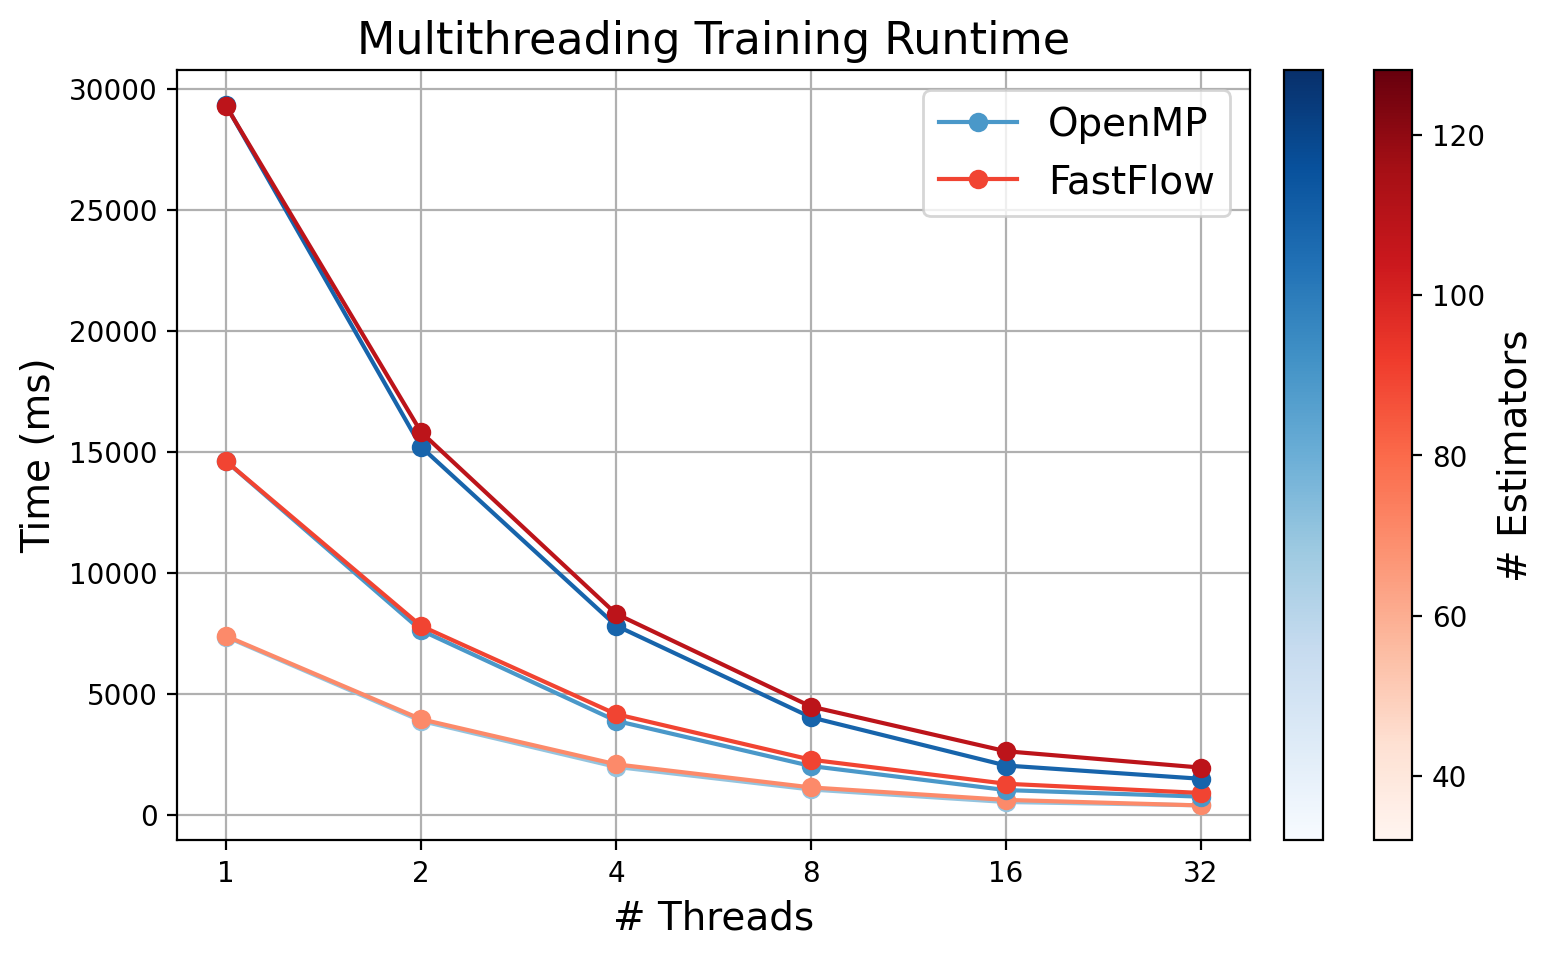

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

omp = df[df["backend"] == "omp"]
ff  = df[df["backend"] == "ff"]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Training Runtime", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds  = plt.cm.Reds (np.linspace(0.4, 0.8, len(estimators)))

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e  = ff [ff ["estimators"] == e]

    ax.plot(
        omp_e["threads"], omp_e["train_time"],
        marker="o", color=blues[i]
    )

    ax.plot(
        ff_e["threads"], ff_e["train_time"],
        marker="o", color=reds[i]
    )

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])

ax.set_xlabel("# Threads", fontsize=14)
ax.set_ylabel("Time (ms)", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker='o', label='OpenMP')
ff_handle  = plt.Line2D([], [], color=reds[1], marker='o', label='FastFlow')
ax.legend(handles=[omp_handle, ff_handle], fontsize=14)

plt.show()

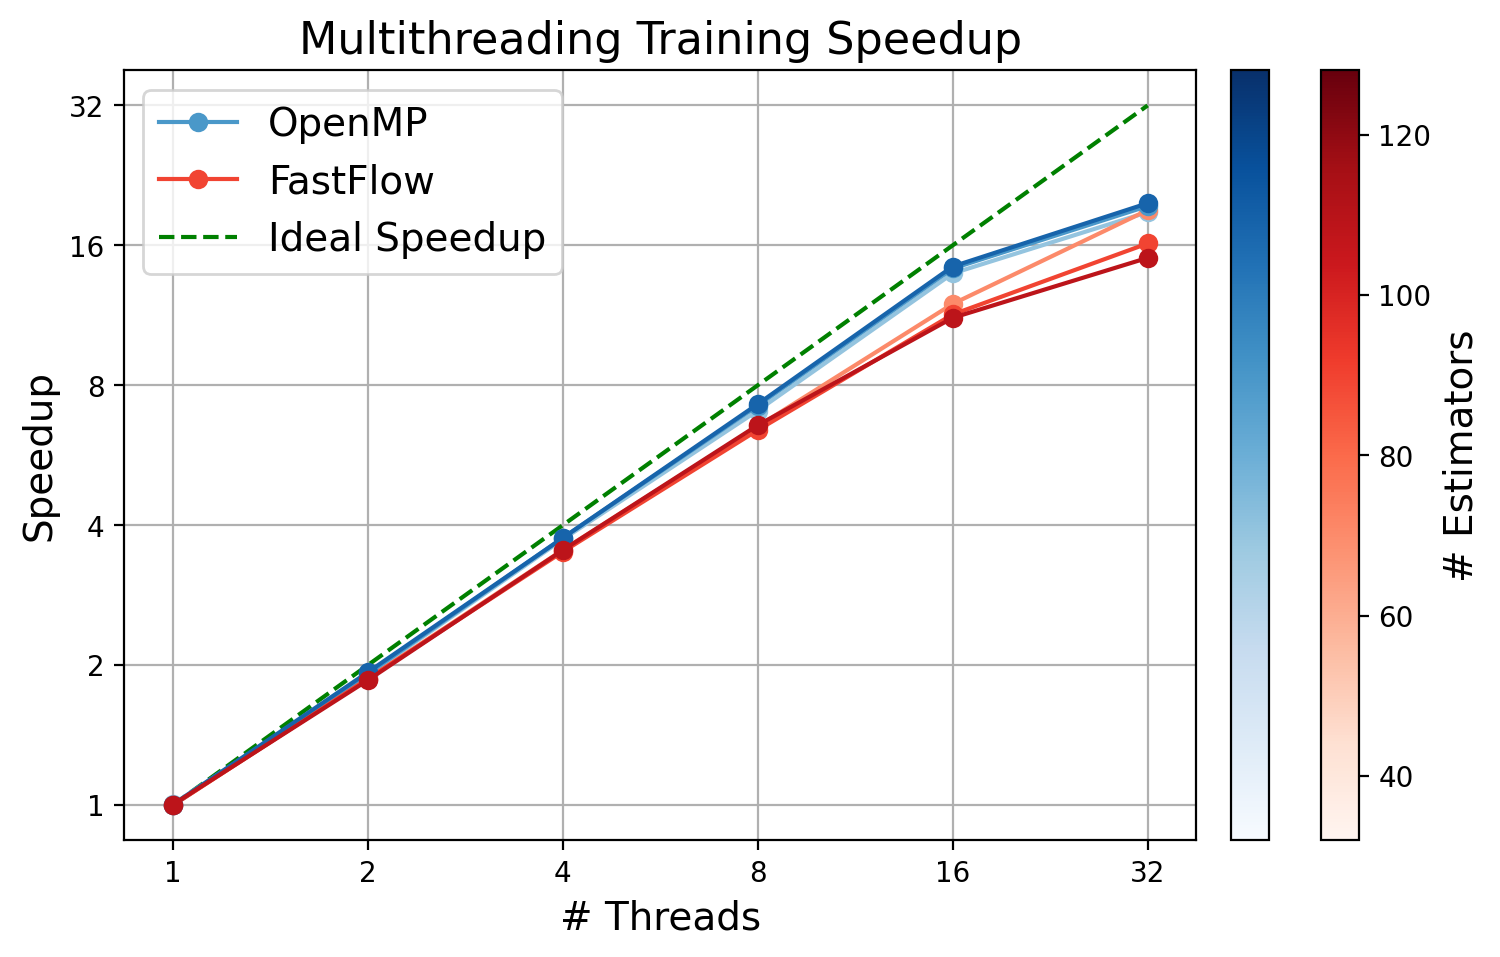

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

omp = df[df["backend"] == "omp"]
ff  = df[df["backend"] == "ff"]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Training Speedup", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds  = plt.cm.Reds (np.linspace(0.4, 0.8, len(estimators)))

ax.plot([1, 32], [1, 32], "g--")

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e  = ff [ff ["estimators"] == e]

    ax.plot(
        omp_e["threads"], omp_e["train_speedup"],
        marker="o", color=blues[i]
    )

    ax.plot(
        ff_e["threads"], ff_e["train_speedup"],
        marker="o", color=reds[i]
    )

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])
ax.set_yticks(ticks)
ax.set_yticklabels([str(t) for t in ticks])

ax.set_xlabel("# Threads", fontsize=14)
ax.set_ylabel("Speedup", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker='o', label='OpenMP')
ff_handle  = plt.Line2D([], [], color=reds[1], marker='o', label='FastFlow')
ideal_handle  = plt.Line2D([], [], color="green", linestyle='--', label='Ideal Speedup')
ax.legend(handles=[omp_handle, ff_handle, ideal_handle], fontsize=14)

plt.show()

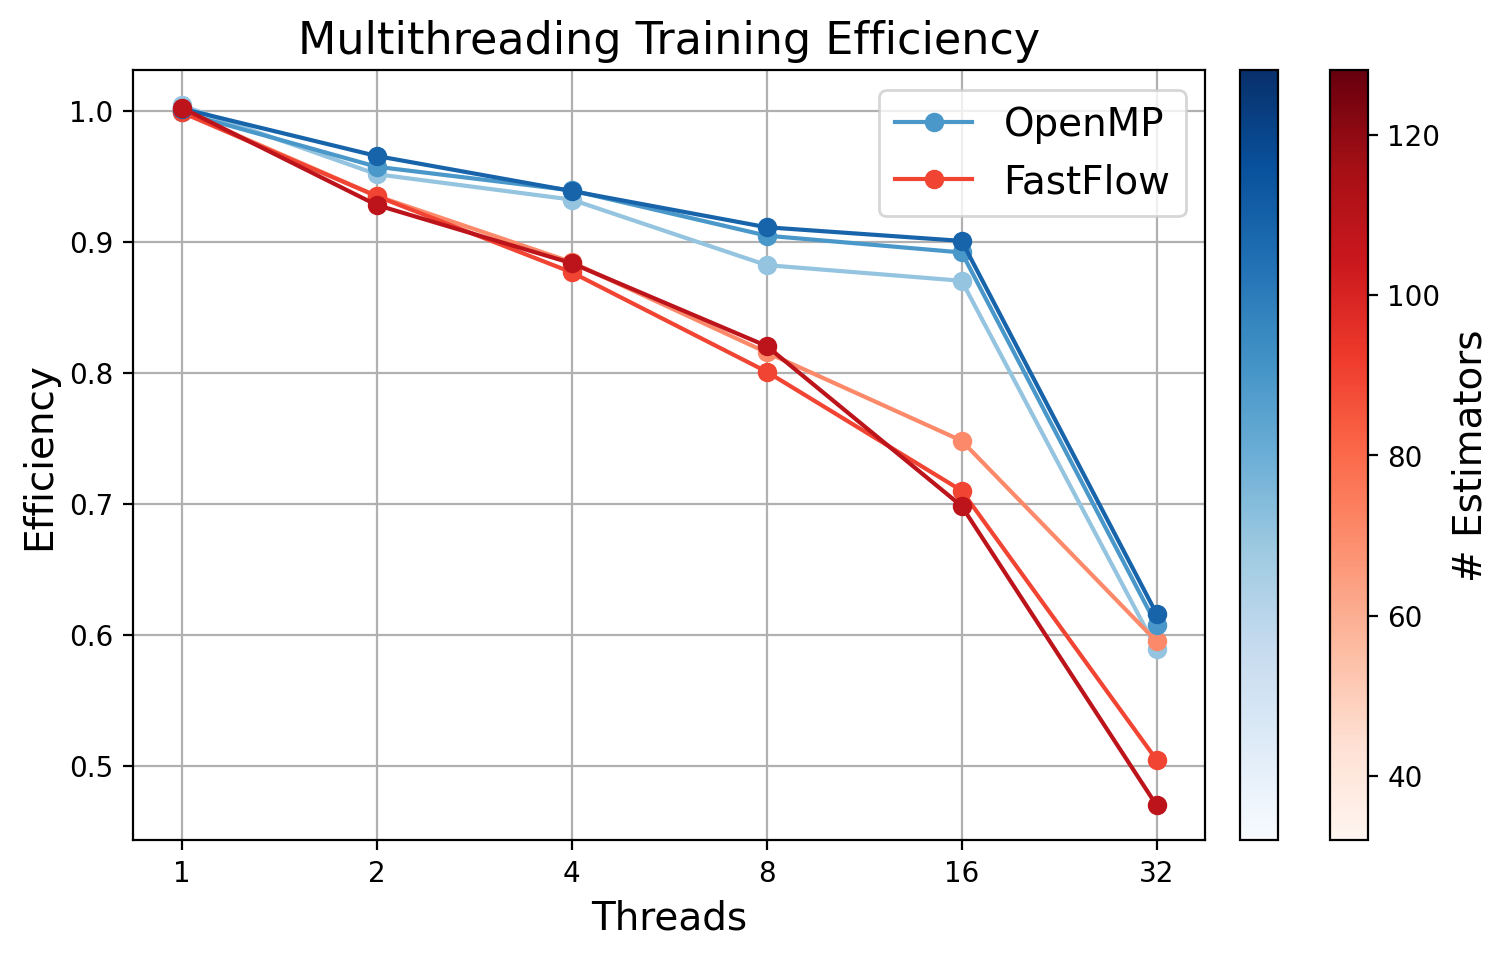

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

omp = df[df["backend"] == "omp"]
ff  = df[df["backend"] == "ff"]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Training Efficiency", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds  = plt.cm.Reds (np.linspace(0.4, 0.8, len(estimators)))

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e  = ff [ff ["estimators"] == e]

    ax.plot(
        omp_e["threads"], omp_e["train_efficiency"],
        marker="o", color=blues[i]
    )

    ax.plot(
        ff_e["threads"], ff_e["train_efficiency"],
        marker="o", color=reds[i]
    )

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])

ax.set_xlabel("Threads", fontsize=14)
ax.set_ylabel("Efficiency", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker='o', label='OpenMP')
ff_handle  = plt.Line2D([], [], color=reds[1], marker='o', label='FastFlow')
ax.legend(handles=[omp_handle, ff_handle], fontsize=14)

plt.show()

In [40]:
keys = ["estimators", "max_depth"]
merged = seq.merge(df, how="right", on=keys, suffixes=("_seq", "_mt"))

df["predict_speedup"] = merged["test_predict_time_seq"] / merged["test_predict_time_mt"]
df["predict_efficiency"] = df["predict_speedup"] / merged["threads_mt"]

df

,estimators,max_depth,backend,threads,nodes,train_accuracy,train_f1,test_accuracy,test_f1,train_time,train_predict_time,test_predict_time,train_speedup,train_efficiency,predict_speedup,predict_efficiency
0,32,0,ff,1,1,0.99816,0.99798,0.875920,0.858581,7392.5680,52.70010,15.583080,0.999898,0.999898,0.809878,0.809878
1,32,0,ff,2,1,0.99816,0.99798,0.875920,0.858581,3952.6120,32.04366,8.844894,1.870109,0.935055,1.426857,0.713429
2,32,0,ff,4,1,0.99816,0.99798,0.875920,0.858581,2089.1560,19.02350,6.378232,3.538183,0.884546,1.978667,0.494667
3,32,0,ff,8,1,0.99816,0.99798,0.875920,0.858581,1132.8100,15.26678,4.745166,6.525204,0.815650,2.659633,0.332454
4,32,0,ff,16,1,0.99816,0.99798,0.875920,0.858581,617.3878,13.15764,5.628466,11.972728,0.748295,2.242245,0.140140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,128,0,omp,4,1,1.00000,1.00000,0.873554,0.856095,7822.2760,51.61076,14.158820,3.755252,0.938813,3.523450,0.880863
59,128,0,omp,8,1,1.00000,1.00000,0.873554,0.856095,4029.8900,28.39786,7.637790,7.289187,0.911148,6.531719,0.816465
60,128,0,omp,16,1,1.00000,1.00000,0.873554,0.856095,2038.2380,15.44988,4.333010,14.411771,0.900736,11.513451,0.719591
61,128,0,omp,32,1,1.00000,1.00000,0.873554,0.856095,1489.8140,12.48926,3.606684,19.716971,0.616155,13.832068,0.432252


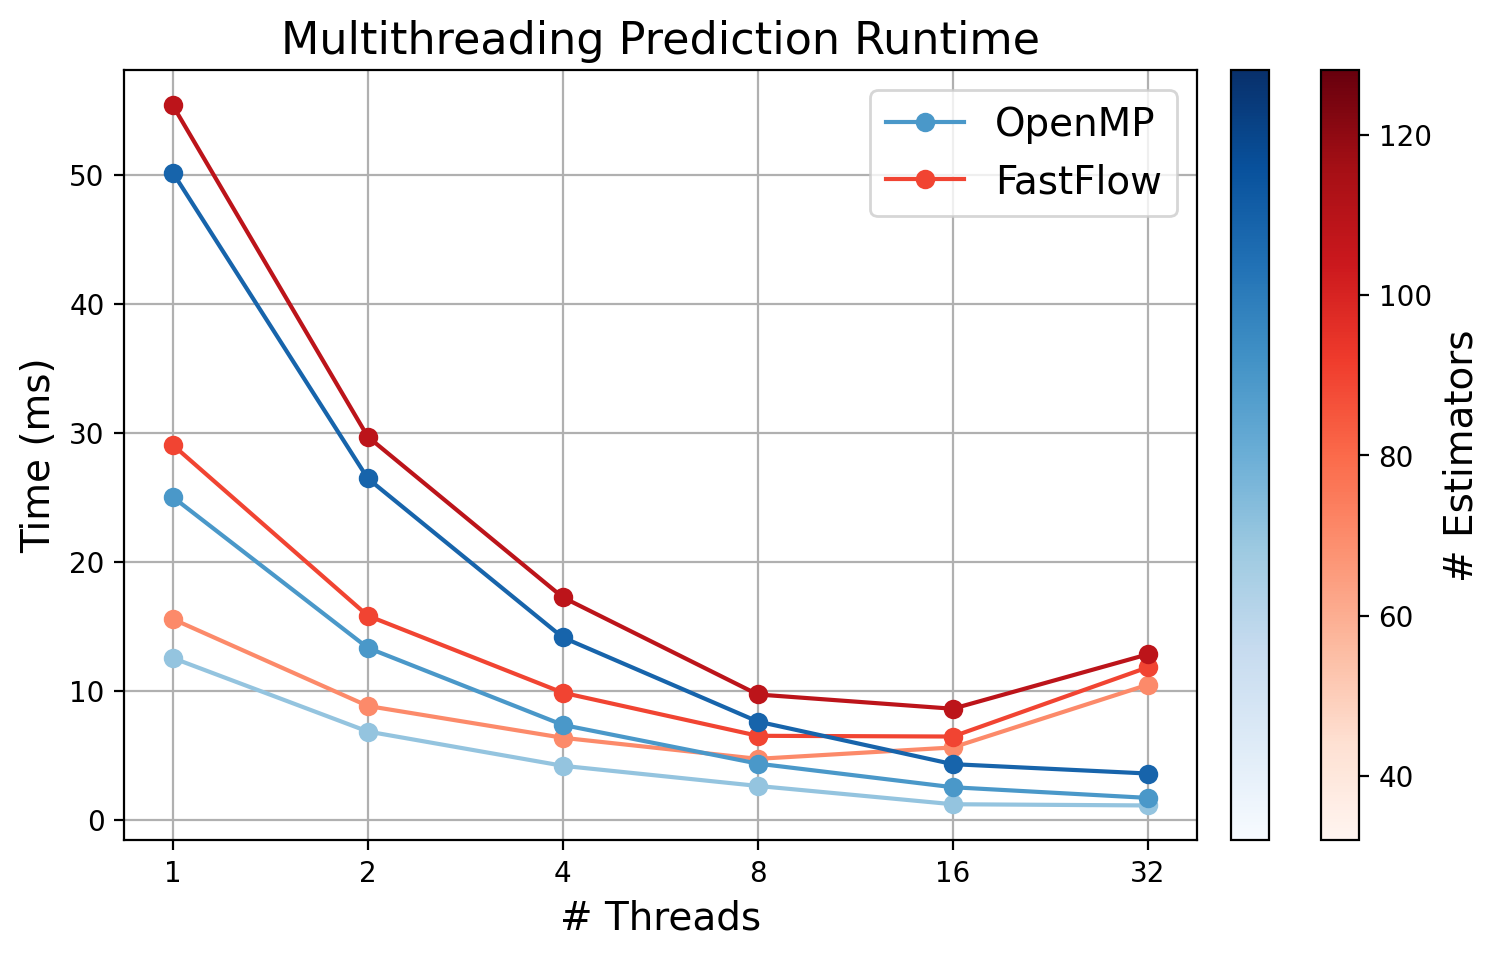

In [41]:
omp = df[df["backend"] == "omp"]
ff  = df[df["backend"] == "ff"]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Prediction Runtime", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds  = plt.cm.Reds (np.linspace(0.4, 0.8, len(estimators)))

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e  = ff [ff ["estimators"] == e]

    ax.plot(
        omp_e["threads"], omp_e["test_predict_time"],
        marker="o", color=blues[i]
    )

    ax.plot(
        ff_e["threads"], ff_e["test_predict_time"],
        marker="o", color=reds[i]
    )

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])

ax.set_xlabel("# Threads", fontsize=14)
ax.set_ylabel("Time (ms)", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker='o', label='OpenMP')
ff_handle  = plt.Line2D([], [], color=reds[1], marker='o', label='FastFlow')
ax.legend(handles=[omp_handle, ff_handle], fontsize=14)

plt.show()

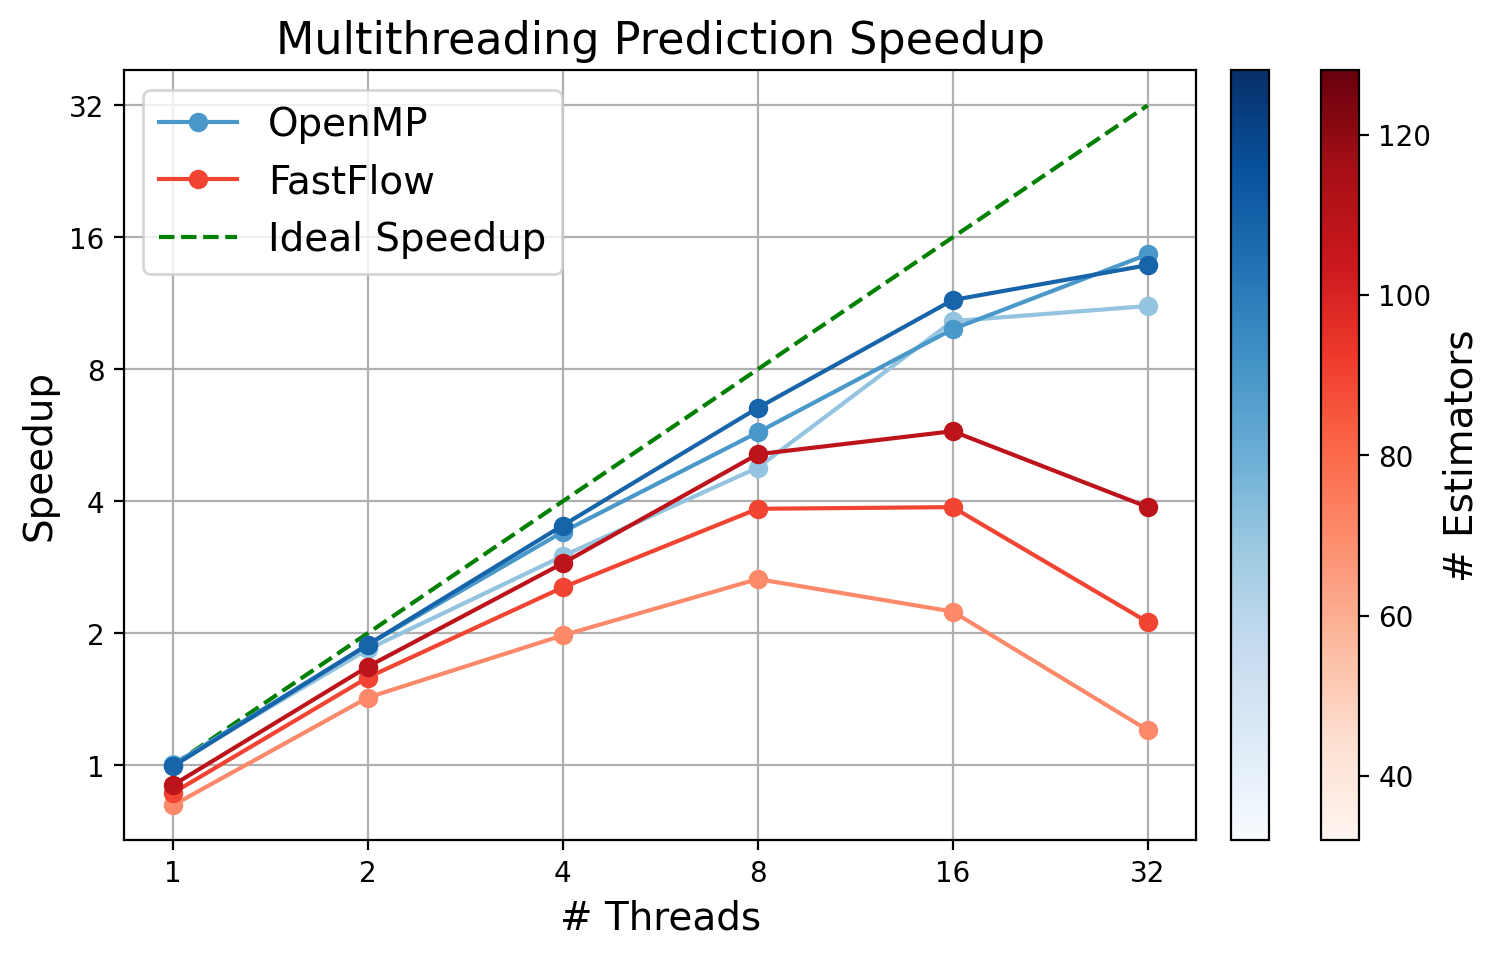

In [42]:
omp = df[df["backend"] == "omp"]
ff  = df[df["backend"] == "ff"]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Prediction Speedup", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds  = plt.cm.Reds (np.linspace(0.4, 0.8, len(estimators)))

ax.plot([1, 32], [1, 32], "g--")

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e  = ff [ff ["estimators"] == e]

    ax.plot(
        omp_e["threads"], omp_e["predict_speedup"],
        marker="o", color=blues[i]
    )

    ax.plot(
        ff_e["threads"], ff_e["predict_speedup"],
        marker="o", color=reds[i]
    )

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])
ax.set_yticks(ticks)
ax.set_yticklabels([str(t) for t in ticks])

ax.set_xlabel("# Threads", fontsize=14)
ax.set_ylabel("Speedup", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker='o', label='OpenMP')
ff_handle  = plt.Line2D([], [], color=reds[1], marker='o', label='FastFlow')
ideal_handle  = plt.Line2D([], [], color="green", linestyle='--', label='Ideal Speedup')
ax.legend(handles=[omp_handle, ff_handle, ideal_handle], fontsize=14)

plt.show()

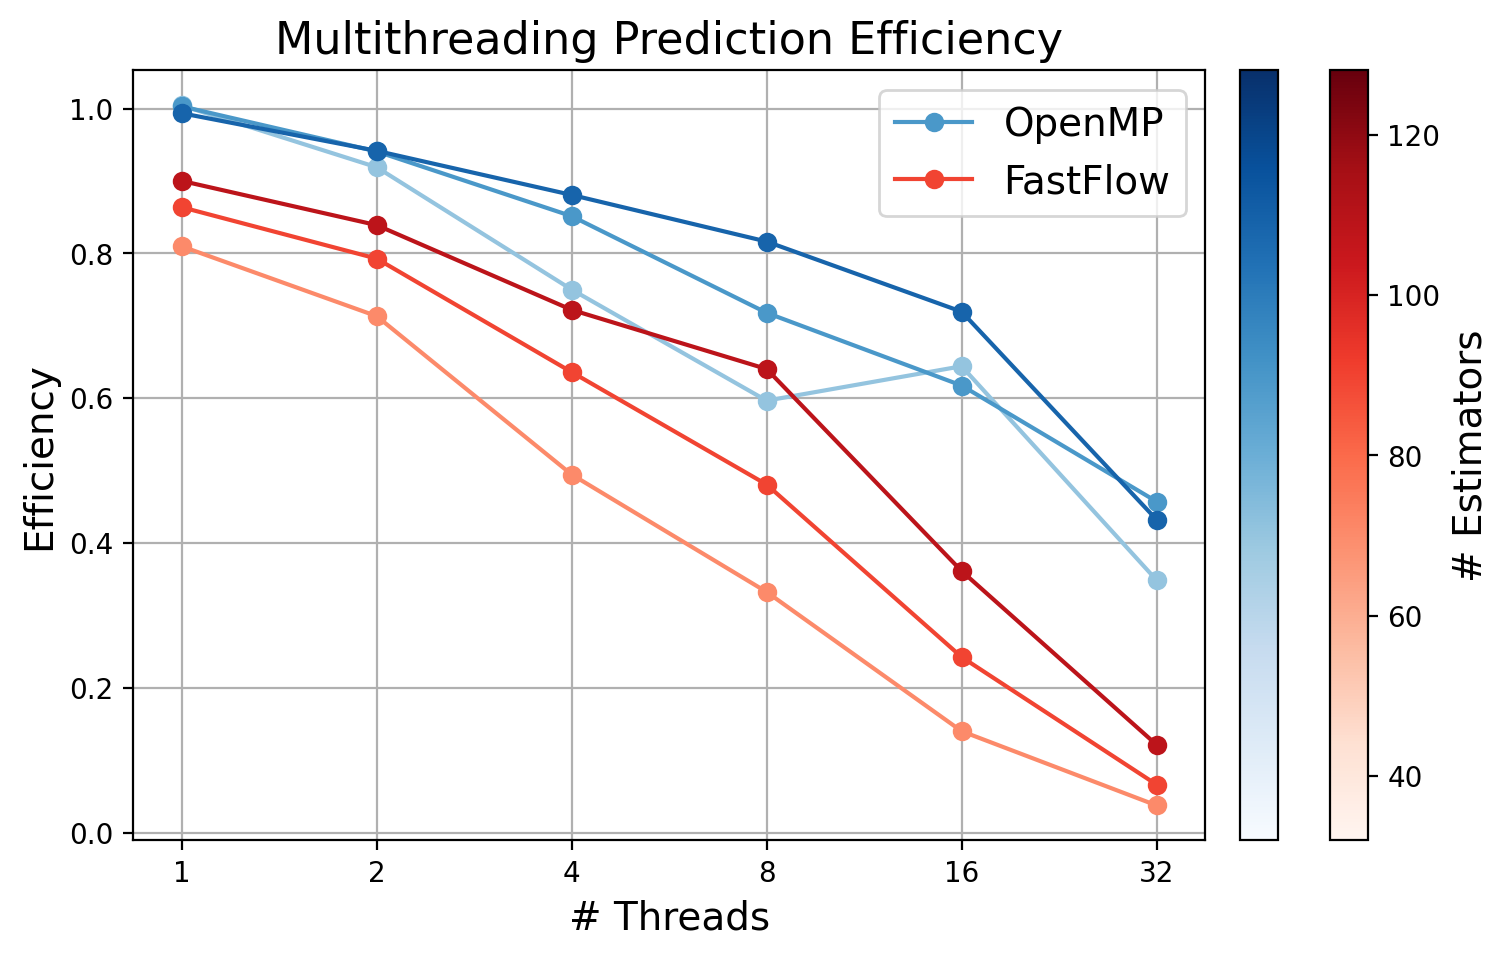

In [43]:
omp = df[df["backend"] == "omp"]
ff  = df[df["backend"] == "ff"]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Prediction Efficiency", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds  = plt.cm.Reds (np.linspace(0.4, 0.8, len(estimators)))

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e  = ff [ff ["estimators"] == e]

    ax.plot(
        omp_e["threads"], omp_e["predict_efficiency"],
        marker="o", color=blues[i]
    )

    ax.plot(
        ff_e["threads"], ff_e["predict_efficiency"],
        marker="o", color=reds[i]
    )

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])

ax.set_xlabel("# Threads", fontsize=14)
ax.set_ylabel("Efficiency", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker='o', label='OpenMP')
ff_handle  = plt.Line2D([], [], color=reds[1], marker='o', label='FastFlow')
ax.legend(handles=[omp_handle, ff_handle], fontsize=14)

plt.show()